# 1. Import and Install Dependencies

In [1]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [10]:
draw_landmarks(frame, results)

NameError: name 'frame' is not defined

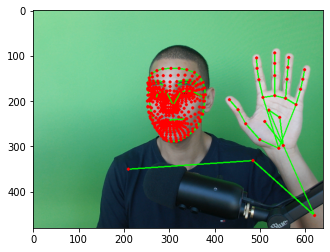

In [31]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [114]:
len(results.left_hand_landmarks.landmark)

21

In [60]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [105]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [7]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [8]:
result_test

NameError: name 'result_test' is not defined

In [124]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('dataset') 

# Actions that we try to detect
# 여기 몇 개씩만 잘라서 학습시키기! 안 그러면 멈출 수 없습니다!
actions = np.array(['a', 'b', 'c', 'd', 'e', 'f','g', 'h', 'i' , 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u','v', 'w', 'x', 'y', 'z'])
# 
#  'n', 'o', 'p', 'q', 'r', 's', 't', 'u','v', 'w', 'x', 'y', 'z'

# Thirty videos worth of data
# 추가 구축 시 얼만큼 추가할 것인가
# no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# 추가 구축 시 어느 폴더부터 시작할 것인가
# start_folder = 60

In [4]:
for action in actions: 
    # 추가 구축 시 쓰는 코드
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1, no_sequences+1):
        try: 
            # os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            # 추가 구축 시 쓰는 코드
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        # for sequence in range(no_sequences):
        # 추가 구축 시 index
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
np.array(sequences).shape

(2600, 30, 258)

In [15]:
np.array(labels).shape

(2600,)

In [16]:
X = np.array(sequences)

In [17]:
X.shape

(2600, 30, 258)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
y_test.shape

(260, 26)

# 7. Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [23]:
log_dir = os.path.join('Logs_half_0617_01')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

2022-06-17 18:37:00.583630: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 18:37:00.584807: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
74/74 [==============================] - 12s 121ms/step - loss: 3.8150 - categorical_accuracy: 0.0407
Epoch 2/200
74/74 [==============================] - 9s 117ms/step - loss: 3.2103 - categorical_accuracy: 0.0633
Epoch 3/200
74/74 [==============================] - 9s 116ms/step - loss: 3.1809 - categorical_accuracy: 0.0718
Epoch 4/200
74/74 [==============================] - 9s 117ms/step - loss: 3.1778 - categorical_accuracy: 0.0835
Epoch 5/200
74/74 [==============================] - 9s 118ms/step - loss: 3.1550 - categorical_accuracy: 0.0577
Epoch 6/200
74/74 [==============================] - 9s 117ms/step - loss: 3.0305 - categorical_accuracy: 0.0693
Epoch 7/200
74/74 [==============================] - 9s 115ms/step - loss: 3.2648 - categorical_accuracy: 0.0362
Epoch 8/200
74/74 [==============================] - 9s 116ms/step - loss: 3.2394 - categorical_accuracy: 0.0497
Epoch 9/200
74/74 [==============================] - 9s 117ms/step - loss: 3.1806 - categorical

74/74 [==============================] - 9s 119ms/step - loss: 1.3083 - categorical_accuracy: 0.5623
Epoch 144/200
74/74 [==============================] - 9s 119ms/step - loss: 1.1968 - categorical_accuracy: 0.5740
Epoch 145/200
74/74 [==============================] - 9s 119ms/step - loss: 0.9463 - categorical_accuracy: 0.6770
Epoch 146/200
74/74 [==============================] - 9s 118ms/step - loss: 0.9929 - categorical_accuracy: 0.6476
Epoch 147/200
74/74 [==============================] - 9s 119ms/step - loss: 0.7282 - categorical_accuracy: 0.7368
Epoch 148/200
74/74 [==============================] - 9s 120ms/step - loss: 0.7082 - categorical_accuracy: 0.7526
Epoch 149/200
74/74 [==============================] - 9s 118ms/step - loss: 0.6060 - categorical_accuracy: 0.7963
Epoch 150/200
74/74 [==============================] - 9s 119ms/step - loss: 0.6648 - categorical_accuracy: 0.7719
Epoch 151/200
74/74 [==============================] - 9s 118ms/step - loss: 0.4540 - categori

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                858       
Total params: 238,010
Trainable params: 238,010
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [28]:
res = model.predict(X_test)
res

array([[4.5213415e-04, 3.0774056e-05, 4.9341103e-04, ..., 5.8241550e-11,
        2.2484407e-04, 1.4531477e-07],
       [5.0555289e-05, 1.3227885e-09, 5.0501898e-05, ..., 2.0151481e-15,
        2.7688853e-09, 4.1790000e-12],
       [2.0825648e-20, 3.4511758e-14, 1.4210872e-25, ..., 2.3155248e-07,
        4.8572957e-13, 2.1518458e-06],
       ...,
       [7.5392776e-15, 0.0000000e+00, 8.7939711e-19, ..., 1.3253266e-21,
        2.4632988e-21, 6.0555586e-21],
       [1.2871884e-04, 9.4897860e-06, 7.2938758e-01, ..., 2.6796362e-12,
        1.7207184e-07, 3.4167678e-07],
       [2.8279671e-17, 3.2988266e-21, 4.9126757e-26, ..., 1.2723769e-09,
        5.2421212e-10, 4.4295102e-05]], dtype=float32)

In [29]:
actions[np.argmax(res[6])]

'e'

In [27]:
actions[np.argmax(y_test[6])]

'o'

# 9. Save Weights

In [40]:
model.save('action_CJ_01.h5')

In [66]:
del model

In [15]:
model.load_weights('action_CJ_total_01_0617.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [41]:
yhat = model.predict(X_train)

In [27]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [39]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[673,   0],
        [  2,  27]],

       [[673,   3],
        [  1,  25]],

       [[671,   1],
        [  0,  30]],

       [[674,   0],
        [  3,  25]],

       [[670,   6],
        [  3,  23]],

       [[674,   2],
        [  1,  25]],

       [[678,   1],
        [  2,  21]],

       [[677,   0],
        [  0,  25]],

       [[672,   2],
        [  6,  22]],

       [[675,   0],
        [  0,  27]],

       [[676,   1],
        [  1,  24]],

       [[673,   1],
        [  0,  28]],

       [[675,   0],
        [  0,  27]],

       [[675,   0],
        [  0,  27]],

       [[673,   1],
        [  0,  28]],

       [[674,   0],
        [  0,  28]],

       [[678,   0],
        [  0,  24]],

       [[676,   2],
        [  0,  24]],

       [[673,   1],
        [  0,  28]],

       [[674,   0],
        [  0,  28]],

       [[672,   0],
        [  0,  30]],

       [[676,   1],
        [  1,  24]],

       [[673,   1],
        [  3,  25]],

       [[673,   0],
        [  1, 

In [33]:
accuracy_score(ytrue, yhat)

0.99002849002849

# 11. Test in Real Time

In [16]:
from scipy import stats

In [43]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [43]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [36]:
X_test[0].shape

(30, 258)

In [17]:
print(actions)

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [19]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5


cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, actions[np.argmax(res)], (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

a
o
o
a
a
o
o
o
o
o
o
o
a
a
a
a
a
j
j
j
j
j
j
j
j
j
j
c
c
c
b
b
b
b
b
e
e
e
b
b
f
b
b
b
b
f
f
f
f
f
b
b
b
b
b
b
b
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
b
b
b
b
b
b
b
b
b
f
f
f
f
f
b
f
b
b
o
o
o
o
o
o
o
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
y
y
y
y
y
y
y
y
y
y
y
y
y
m
m
m
m
m
m
m
m
m
m
y
y
y
y
y
y
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
a
a
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
i
i
i
e
e
b
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
b
b
f
b
b
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
a
a
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
m
m


k
k
s
s
s
s
s
s
s
r
r
r
r
r
r
s
s
s
s
s
s
s
s
z
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
r
s
s
s
s
s
s
s
v
s
s
s
r
r
r
r
r
r
r
r
r
s
s
r
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
s
s
r
s
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
w
w
w
w
w
w
w
r
r
r
r
r
r
r
r
r
r
r
r
w
w
w
w
w
w
w
w
w
w
b
b
b
b
b
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
w
r
r
r
r
r
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
g
g
g
g
j
j
k
l
l
l
m
m
a
a
a
a
a
a
a
a
j
j
j
j
j
j
k
k
a
a
a
a
a
a
a
j
j
j
j
j
j
j
j
j
j
j
k
k
a
a
a
a
a
a
a
a
a
k
k
k
k
k
k
k
k
k
k
k
j
j
k
k
k
a
a
a
k
k
k
h
h
h
h
h
h
h
k
k
k
k
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
z
z
z
z
z
z
z
z
z
z
z
z
z
z
z
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
q
z
z
z
z
z
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
g
g
g
g
g
g
g
j
j
j
j


KeyboardInterrupt: 

In [20]:
cv2.destroyAllWindows()